# Keep fastai install up to date

In [6]:
!pip3 install -Uq fastai duckduckgo_search

![xkcd](https://imgs.xkcd.com/comics/account_problems.png)

In [53]:
# function to search duckduck go for images
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

def search_images_2(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')    
    headers = dict( referer='https://duckduckgo.com/' )
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        res = urlread(requestUrl, data=params, headers=headers)
        data = json.loads(res) if res else {}
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

#Test
urls = search_images('bird photos', max_images=1)
urls2 = search_images('butterfly photos', max_images=1)
print(f"  urls={urls}\n  urls2={urls2}")

Searching for 'bird photos'
Searching for 'butterfly photos'
  urls=['https://2.bp.blogspot.com/-LZ4VixDdVoE/Tq0ZhPycLsI/AAAAAAAADDM/OKyayfW-z4U/s1600/beautiful_Birds_wallpapers_pictures_Kingfisher_Lilac+Breasted+Roller+Bird.JPG']
  urls2=['https://americanprofile.com/wp-content/uploads/2011/04/a-monarch-butterfly.jpg']


Searching for 'bird photos'


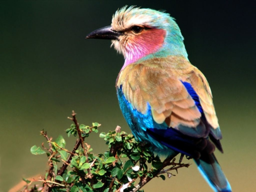

Searching for 'paula photos'


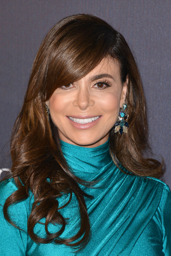

Searching for 'butterfly photos'


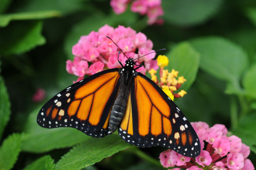

Searching for 'sky photos'


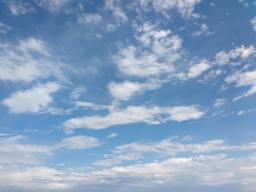

In [100]:
from fastdownload import download_url
from fastai.vision.all import *
images = ["bird", "paula", "butterfly", "sky"]
for img in images:
    dest = f"ai-{img}.jpg"
    urls=search_images(f'{img} photos', max_images=1)
    download_url(urls[0], dest, show_progress=False)
    #print(f"dest={dest} url={urls[0]} img={img}")
    im = Image.open(dest)
    display( im.to_thumb(256,256) )

    

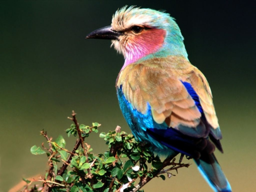

In [96]:
im = Image.open("bird.jpg")
im.to_thumb(256,256)

Searching for 'birds photos'
img=birds url=https://2.bp.blogspot.com/-LZ4VixDdVoE/Tq0ZhPycLsI/AAAAAAAADDM/OKyayfW-z4U/s1600/beautiful_Birds_wallpapers_pictures_Kingfisher_Lilac+Breasted+Roller+Bird.JPG


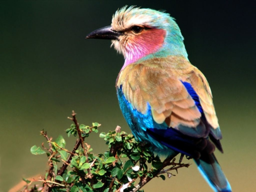

In [90]:
img="birds"
dest=f'{img}.jpg'
download_url(search_images(f'{img} photos', max_images=1)[0], dest, show_progress=False)
print(f"img={img} url={urls[0]}")
im = Image.open(dest)
im.to_thumb(256,256)


In [ ]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep
from urllib.parse import urlparse

for o in searches:
    dest = (path/o)  #Path extend :)
    dest.mkdir(exist_ok=True, parents=True)
    for pt in ["photo", "sun photo", "shade photo"]:
        urls=[ u for u in search_images(f'{o} {pt}') if any(urlparse(u).path.endswith(ext) for ext in [".jpg",".jpeg", "png"]) ]
        print(f"  Downloading {len(urls)} into {dest}")
        #print(urls)
        download_images(dest, urls=urls)
        sleep(4)  # Pause between searches to avoid over-loading server
    failed = verify_images(get_image_files(dest))
    failed.map(Path.unlink)
    print(f"  Deleted {len(failed)} broken images
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


Done. time 0.3761392501182854


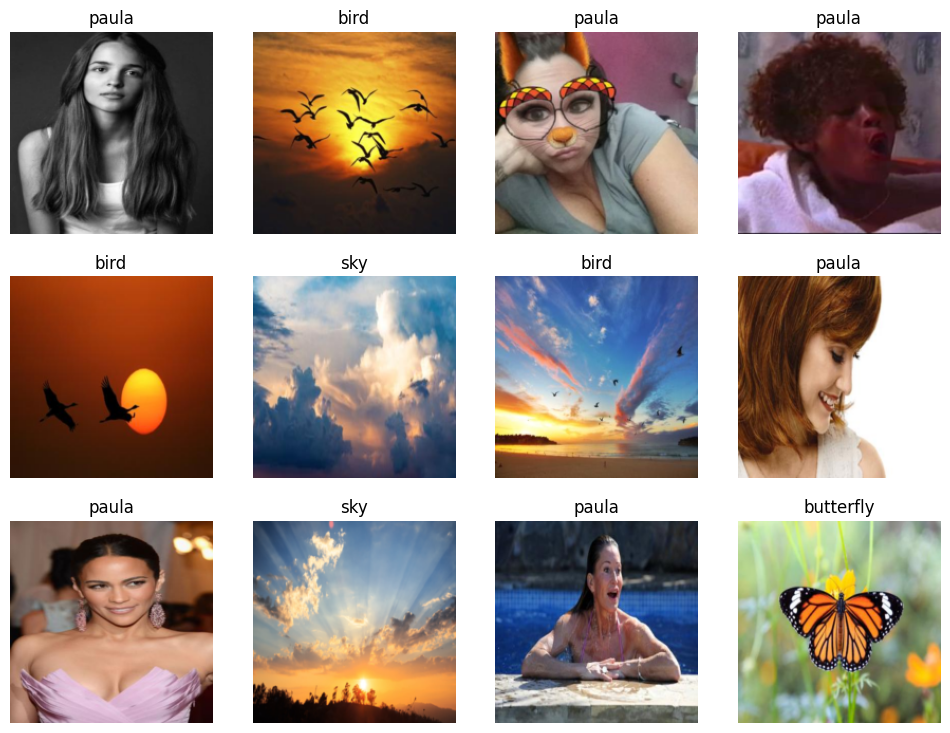

In [105]:
# loads from path
t_start=time.monotonic()
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,  #use folder as name
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)
print(f"Done. time {time.monotonic()-t_start}")  

In [106]:
# Train model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [113]:
# Test model
images = ["bird", "paula", "butterfly", "sky"]
t_start=time.monotonic()
for img in images:
    is_bird,_,probs = learn.predict(PILImage.create(f'ai-{img}.jpg'))
    print(f"This is a: {is_bird}.  img=ai-{img}.jpg")
    print(f"Probability it's a bird: {probs[0]:.4f}")
print(f"Done. time {time.monotonic()-t_start:.3f}s") 

This is a: bird.  img=ai-bird.jpg
Probability it's a bird: 0.9869


This is a: paula.  img=ai-paula.jpg
Probability it's a bird: 0.0000


This is a: butterfly.  img=ai-butterfly.jpg
Probability it's a bird: 0.0000


This is a: sky.  img=ai-sky.jpg
Probability it's a bird: 0.0000
Done. time 0.838s


Simple plot


In [47]:
a = 1
b = a + 1
c = b + a + 1
d = c + b + a + 1
a, b, c ,d

(1, 2, 4, 8)

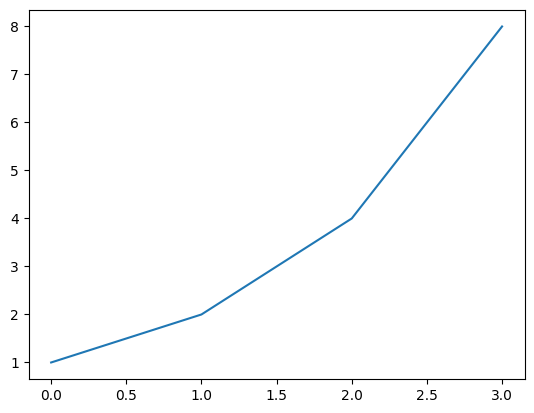

In [48]:
import matplotlib.pyplot as plt

plt.plot([a,b,c,d])
plt.show()